## Dependencies imports

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement

In real-world industrial systems, machine failures are **rare but critical events**, resulting in highly **imbalanced datasets** where normal operating conditions significantly outnumber failure cases. Machine learning models trained on such data often become biased toward the majority class, leading to poor failure detection performance and unreliable maintenance decisions.

The problem addressed in this project is to **develop and evaluate machine learning approaches capable of accurately identifying machine failure events from highly imbalanced operational data**. Using a synthetic milling machine dataset, the project focuses on understanding the impact of class imbalance on model performance and applying suitable techniques—such as resampling strategies, class weighting, and appropriate evaluation metrics—to improve failure detection without compromising model reliability.

The ultimate goal is not only to achieve predictive accuracy, but also to **build a practical understanding of modeling trade-offs** in predictive maintenance scenarios, where false negatives can be significantly more costly than false positives.

## Objective 

**Project Context and Objective**

This project uses a **synthetic predictive maintenance dataset** modeled after a real-world milling machine. The dataset includes multiple independent failure modes and a highly **imbalanced target variable**, closely reflecting real industrial operating conditions.

The primary objective of this project is to **learn and demonstrate techniques for handling imbalanced datasets** in machine learning, with a focus on preprocessing strategies, evaluation metrics, and modeling considerations relevant to predictive maintenance applications.

---

**Dataset Attribution and Credits**

The dataset used in this project originates from the following research publication:

**S. Matzka**  
*Explainable Artificial Intelligence for Predictive Maintenance Applications*  
Proceedings of the **2020 Third International Conference on Artificial Intelligence for Industries (AI4I)**, pp. 69–74.

All credit for the dataset design, failure modeling, and methodology belongs to the **original author and publisher**. This project is strictly for **educational and learning purposes**.

## EDA

### 1.1 Dataset info

In [123]:
df= pd.read_csv("C:/sai files/projects/predictive-maintenance-end2end/test.csv")

In [124]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [125]:
df.shape

(90954, 13)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [127]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,181905.500000,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,26256.302529,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,136429.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,159167.250000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,181905.500000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,204643.750000,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [128]:
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(0)

In [129]:
# Missing Values/Null Values Count
df.isna().sum() #gives total count of null values in each column
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### 1.2 variables Description

1. **Type**
   Indicates the quality of the product, classified into categories such as Low, Medium, or High.

2. **Air Temperature [K]**
   Represents the air temperature, which is simulated using a random process and adjusted to have a certain variability around a standard value.

3. **Process Temperature [K]**
   Represents the temperature within the process, generated with a slight increase over the air temperature and adjusted to a specific variability.

4. **Rotational Speed [rpm]**
   Describes the speed at which the machine operates, calculated based on a fixed power level with added random variation.

5. **Torque [Nm]**
   Measures the force applied by the machine, distributed around a certain average value with specific variation, ensuring positive values only.

6. **Tool Wear [min]**
   Indicates the wear on the tool, with the duration increasing based on the quality category of the product.

7. **Tool Wear Failure**
   Occurs when the tool is replaced or fails after a certain amount of usage time, which is randomly determined within a specific range.

8. **Heat Dissipation Failure**
   Happens if the temperature difference between the air and process is too small and the machine speed is below a certain threshold.

9. **Power Failure**
    Occurs when the power required for the process, calculated from torque and speed, falls outside of a defined acceptable range.

10. **Overstrain Failure**
    Occurs if the combined effect of tool wear and torque exceeds specific limits based on the product quality.

11. **Random Failures**
    Represents a small probability of failure occurring randomly, independent of other process parameters.

### 1.3 Dataset Overview

The dataset consists of **90,954 machine operation records** with **13 distinct features**, representing operational, thermal, mechanical, and failure-related characteristics of a milling machine. All columns contain **non-null values**, indicating the absence of structurally missing data. While this reduces the need for imputation, further validation is required to identify **outliers, abnormal operating conditions, or logically inconsistent values** that may affect downstream analysis and modeling.

The dataset is derived from the **AI4I 2020 Predictive Maintenance dataset** and represents a larger version of the original data.

---

**Key Observations**

**1. Data Volume & Completeness**
- The dataset includes **90,954 observations**, providing sufficient scale for **exploratory data analysis (EDA)** and robust machine learning experiments.
- All **13 features are fully populated**, enabling straightforward preprocessing without handling missing values.

---

**2. Feature Composition and Data Types**
The dataset contains a structured mix of feature types:

- **Numerical features**
  - Continuous variables such as `Air temperature [K]`, `Process temperature [K]`, and `Torque [Nm]`, capturing thermal and mechanical behavior.
  - Discrete numerical variables including `Rotational speed [rpm]` and `Tool wear [min]`, representing operational intensity and tool condition.

- **Categorical features**
  - `Product ID` and `Type`, indicating product variants and quality categories used during machine operation.

- **Failure indicator variables**
  - Binary columns (`TWF`, `HDF`, `PWF`, `OSF`, `RNF`) representing independent failure modes associated with machine operation.

- **Identifier attribute**
  - `id`, serving as a unique row-level identifier and not intended for predictive modeling.

---

**3. Target Variable Construction**
The dataset does not provide a single explicit target label for machine failure. Instead, failure information is distributed across **five independent binary failure indicators**:

- **Tool Wear Failure (TWF)**
- **Heat Dissipation Failure (HDF)**
- **Power Failure (PWF)**
- **Overstrain Failure (OSF)**
- **Random Failure (RNF)**

A derived **machine failure target** must therefore be constructed, where a machine failure is defined as the occurrence of **at least one** of the above failure modes within a given observation. This mirrors realistic industrial scenarios in which the precise failure cause may not be directly observable at prediction time.

---

**4. Failure Distribution and Imbalance**
The individual failure mode counts in the dataset are as follows:

- **Tool Wear Failure (TWF):** 134 occurrences  
- **Heat Dissipation Failure (HDF):** 486 occurrences  
- **Power Failure (PWF):** 214 occurrences  
- **Overstrain Failure (OSF):** 352 occurrences  
- **Random Failure (RNF):** 210 occurrences  

These counts indicate that failure events are **rare relative to the total number of observations**, resulting in a **highly imbalanced classification problem** once a unified machine failure target is constructed. This imbalance reflects real-world predictive maintenance settings, where failure events are infrequent but operationally critical.

---

**5. Operational and Mechanical Characteristics**
- Thermal conditions are captured through air and process temperatures, enabling analysis of **heat-related failure mechanisms**.
- Mechanical stress is represented by torque, rotational speed, and accumulated tool wear, which are directly linked to **mechanical degradation and overstrain failures**.
- Product quality variations, captured via the `Type` feature, introduce heterogeneity in operating conditions and failure thresholds.

---

**Summary**

Overall, the dataset is **well-structured, complete, and operationally rich**, making it well-suited for **predictive maintenance and failure detection tasks**. The absence of missing values simplifies preprocessing, while the presence of multiple failure modes and severe class imbalance provides a realistic and challenging environment for exploring **imbalanced classification techniques**, feature engineering, and model evaluation strategies.


### 1.4 Visualizations

#### 1.4.1 Distribution Analysis & Key Insights

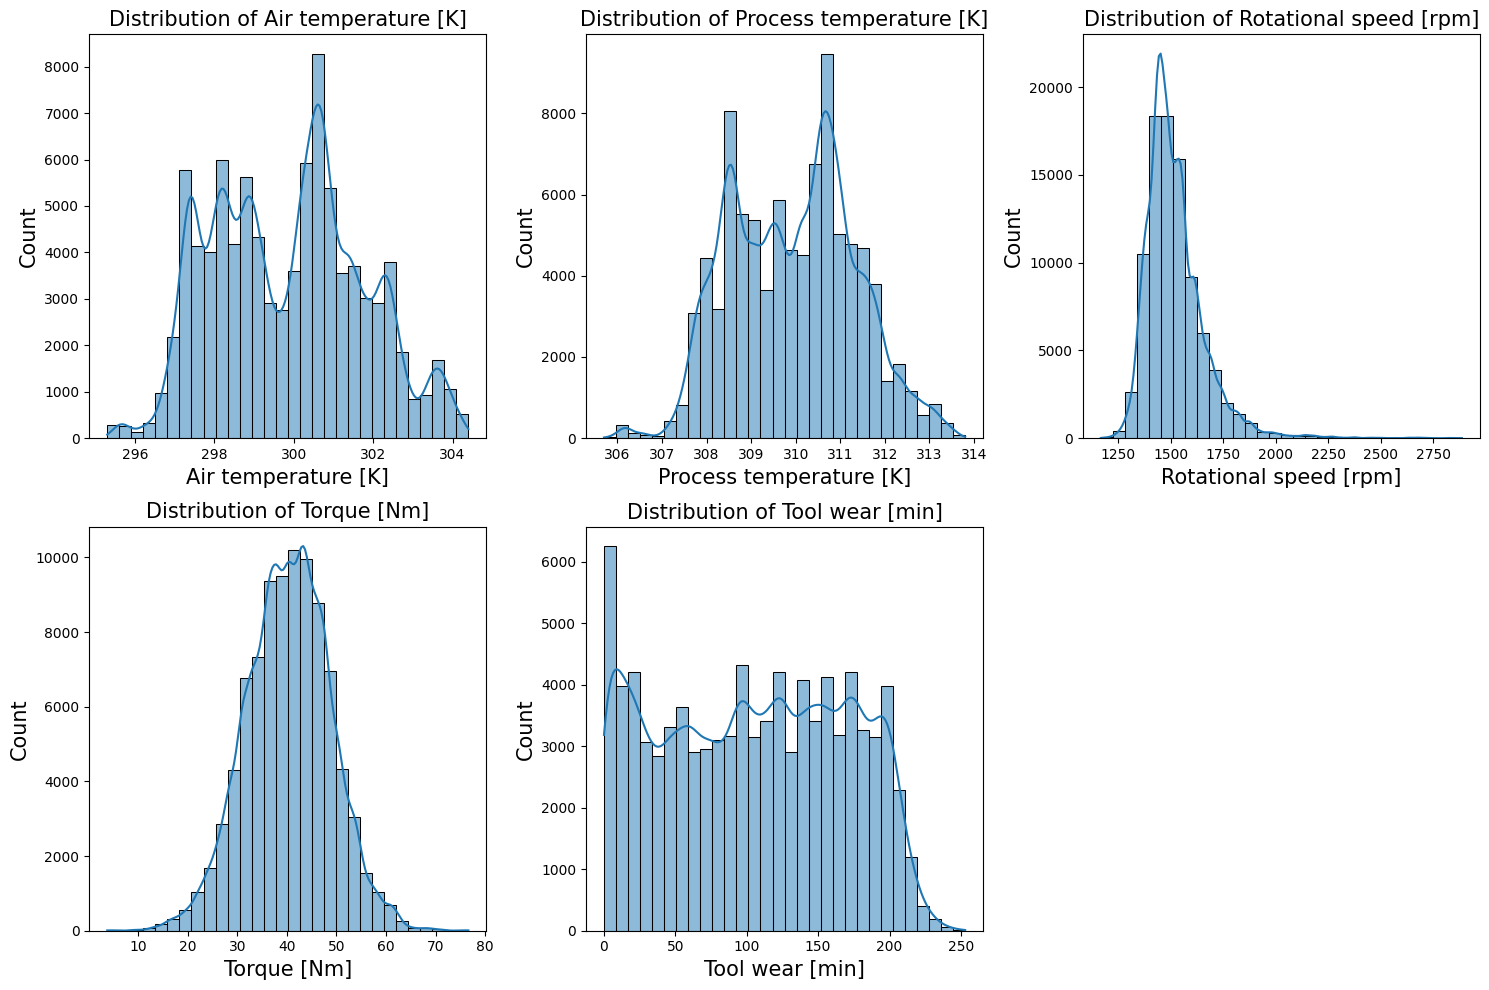

In [130]:
numerical_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Count', fontsize=15)
plt.tight_layout()
plt.show()

In [131]:
df[numerical_cols].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000
mean,299.859493,309.939375,1520.528179,40.335191,104.293962
std,1.857562,1.385296,139.970419,8.504683,63.871092
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000
50%,300.000000,310.000000,1493.000000,40.500000,106.000000
75%,301.200000,310.900000,1579.000000,46.200000,158.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000


**1. Air Temperature [K]**

**Statistical Summary**
- Mean ≈ **299.86 K**, Median = **300 K**
- Low variability (std ≈ **1.86 K**)
- Narrow operating range: **295.3 K – 304.4 K**

**Visual Observations**
- The distribution is approximately **normal**
- Slight multi-modal behavior, consistent with a random walk generation process
- No visible extreme outliers

**Insight**  
Air temperature remains stable and well-controlled, reflecting realistic ambient conditions in an industrial environment. While unlikely to directly trigger failures, it plays an indirect role through interactions with process temperature.

---

**2. Process Temperature [K]**

**Statistical Summary**
- Mean ≈ **309.94 K**, Median = **310 K**
- Very low dispersion (std ≈ **1.39 K**)
- Range: **305.7 K – 313.8 K**

**Visual Observations**
- Nearly symmetric, bell-shaped distribution
- Consistent offset above air temperature
- No extreme deviations observed

**Insight**  
Process temperature closely follows air temperature with minimal variance, indicating controlled process conditions. Its relevance emerges primarily in heat dissipation failures when combined with low rotational speed.

---

**3. Rotational Speed [rpm]**

**Statistical Summary**
- Mean ≈ **1520 rpm**, Median ≈ **1493 rpm**
- Moderate variability (std ≈ **140 rpm**)
- Broad range: **1168 rpm – 2886 rpm**

**Visual Observations**
- Right-skewed distribution
- Dense concentration between **1400–1600 rpm**
- Long tail toward higher rotational speeds

**Insight**  
Rotational speed shows operational variability with occasional high-speed events. These upper-tail values are important, as they may interact with torque to influence power-related failure mechanisms.

---

**4. Torque [Nm]**

**Statistical Summary**
- Mean ≈ **40.3 Nm**, Median ≈ **40.5 Nm**
- Standard deviation ≈ **8.5 Nm**
- Range: **3.8 Nm – 76.6 Nm**

**Visual Observations**
- Approximately normal distribution
- Symmetric around the mean
- Mild tails without extreme outliers

**Insight**  
Torque values are well-centered and mechanically stable. However, elevated torque combined with increasing tool wear is a critical indicator for overstrain-related failures.

---

**5. Tool Wear [min]**

**Statistical Summary**
- Mean ≈ **104.3 min**, Median ≈ **106 min**
- High variability (std ≈ **63.9 min**)
- Full range: **0 – 253 min**

**Visual Observations**
- Clearly right-skewed distribution
- High frequency of low-to-moderate wear values
- Gradual decline toward higher wear levels

**Insight**  
Tool wear exhibits the greatest variability among all features, reflecting cumulative degradation over time. Its skewed distribution underscores its importance as a primary driver of tool wear and overstrain failures.

---

**Cross-Feature Observations**

- Temperature-related features show **tight, well-controlled distributions**.
- Mechanical features demonstrate **greater dispersion**, capturing operational stress and degradation.
- Non-normal behavior in tool wear and rotational speed suggests the need for careful scaling and interaction analysis during modeling.

---

**Summary**

The numerical feature distributions reflect **realistic industrial operating conditions**, with stable thermal behavior and variable mechanical stress indicators. The pronounced variability in tool wear highlights its significance in predictive maintenance and reinforces the dataset’s suitability for studying **imbalanced machine failure prediction**.


#### 1.4.2 Product Types vs Failure Type Distribution

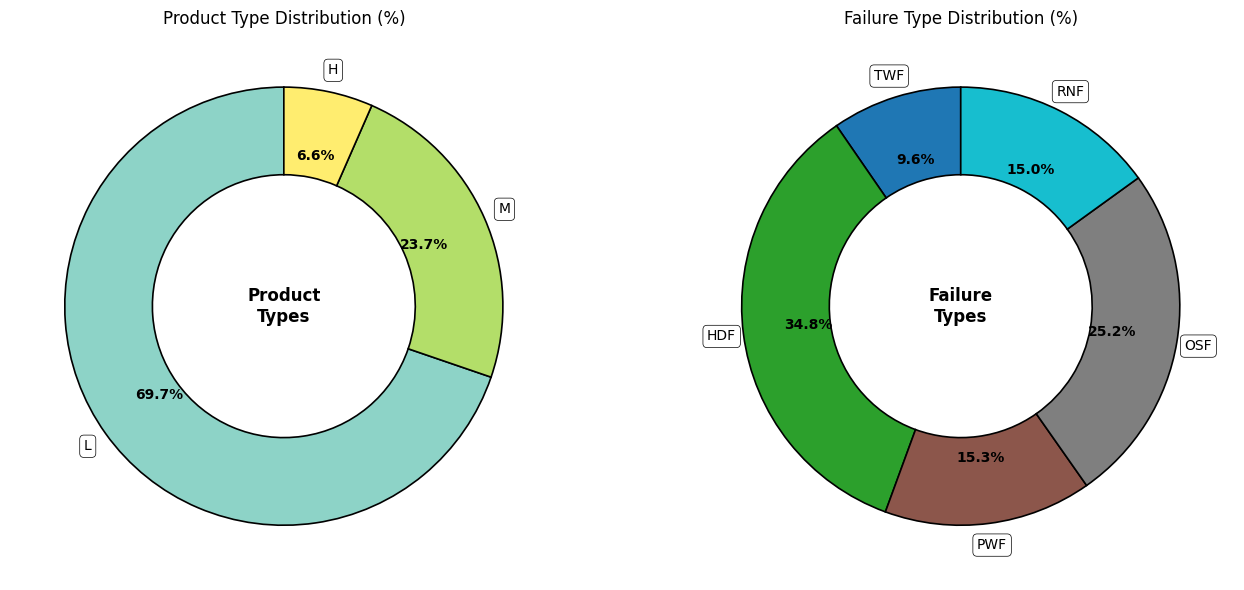

In [132]:
# Data preparation
type_percent = df['Type'].value_counts(normalize=True) * 100

failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_types].sum()
failure_percent = (failure_counts / failure_counts.sum()) * 100

# Side-by-side donut charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Colors
type_colors = plt.cm.Set3(np.linspace(0, 1, len(type_percent))) # type: ignore
failure_colors = plt.cm.tab10(np.linspace(0, 1, len(failure_percent))) # type: ignore

# Function to draw donut and place percentages at middle of donut
def draw_donut(ax, sizes, labels, colors, title, center_label):
    wedges, _ = ax.pie(
        sizes,
        labels=None,  # we'll add labels manually
        startangle=90,
        colors=colors,
        wedgeprops={'width': 0.4, 'edgecolor': 'black', 'linewidth': 1.2}  # border for differentiation
    )

    # Add percentage text at middle of donut
    for wedge, pct in zip(wedges, sizes):
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.7 * np.cos(np.deg2rad(angle))  # 0.7 places it roughly at mid-width
        y = 0.7 * np.sin(np.deg2rad(angle))
        ax.text(x, y, f'{pct:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold')

    # Add labels outside
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)
    for wedge, label in zip(wedges, labels):
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 1.1 * np.cos(np.deg2rad(angle))
        y = 1.1 * np.sin(np.deg2rad(angle))
        ax.text(x, y, label, ha='center', va='center', fontsize=10, bbox=bbox_props)

    # Center label
    ax.text(0, 0, center_label, ha='center', va='center', fontsize=12, fontweight='bold')
    ax.set_title(title)

# --------- Draw Product Type Donut ---------
draw_donut(axes[0], type_percent.values, type_percent.index, type_colors,
           'Product Type Distribution (%)', 'Product\nTypes')

# --------- Draw Failure Type Donut ---------
draw_donut(axes[1], failure_percent.values, failure_percent.index, failure_colors,
           'Failure Type Distribution (%)', 'Failure\nTypes')

plt.tight_layout()
plt.show()

In [133]:
# Product Type percentages
type_percent = df['Type'].value_counts(normalize=True) * 100

# Failure Type percentages
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_types].sum()
failure_percent = (failure_counts / failure_counts.sum()) * 100

# Combine into a single DataFrame
table_df = pd.DataFrame({
    'Product Type': type_percent.index,
    'Product %': type_percent.values.round(2) # type: ignore
})

# Add failure type percentages, filling NaN for unmatched rows
failure_df = pd.DataFrame({
    'Failure Type': failure_percent.index,
    'Failure %': failure_percent.values.round(2)
})

# Combine horizontally
final_table = pd.concat([table_df, failure_df], axis=1)
final_table

,Product Type,Product %,Failure Type,Failure %
0,L,69.75,TWF,9.60
1,M,23.68,HDF,34.81
2,H,6.58,PWF,15.33
3,NaN,NaN,OSF,25.21
4,NaN,NaN,RNF,15.04


**Product Type Distribution**

- **Low-quality (L) products dominate the dataset**, accounting for approximately **69.75%** of all observations.
- **Medium-quality (M) products** represent about **23.68%** of the data.
- **High-quality (H) products** form a relatively small portion, contributing only **6.58%** of the total records.

**Insight**  
The strong skew toward low-quality products suggests that the dataset primarily reflects operating conditions associated with L-type production. As a result, downstream analyses and models may be influenced more heavily by patterns present in low-quality product operations, which should be considered during model evaluation and interpretation.

---

**Failure Type Distribution**

- **Heat Dissipation Failure (HDF)** is the most frequent failure mode, contributing approximately **34.81%** of all failures.
- **Overstrain Failure (OSF)** is the second most common, accounting for around **25.21%**.
- **Power Failure (PWF)** and **Random Failure (RNF)** each contribute roughly **15%**.
- **Tool Wear Failure (TWF)** is the least frequent failure mode, representing about **9.60%** of failures.

**Insight**  
The dominance of heat dissipation and overstrain failures indicates that **thermal and mechanical stress conditions** play a more significant role in machine failures than gradual tool degradation alone. This highlights the importance of monitoring process temperature, torque, and load-related parameters in predictive maintenance applications.

---

**Combined Interpretation**

- The product type distribution and failure type distribution represent **independent views** of the dataset and should not be interpreted as direct causal relationships.
- Given the high prevalence of L-type products, it is likely that a substantial portion of failures occurs under low-quality operating regimes; however, failure modes themselves appear to be driven more by **process and mechanical conditions** than by product quality alone.

**Overall Insight**  
Together, these distributions provide valuable contextual understanding of the dataset’s composition and dominant failure mechanisms. They motivate further analysis of **failure mode behavior conditioned on product type and operational parameters**, which is essential for building robust predictive maintenance models.

#### 1.4.3 Failure Mode Composition by Product Type

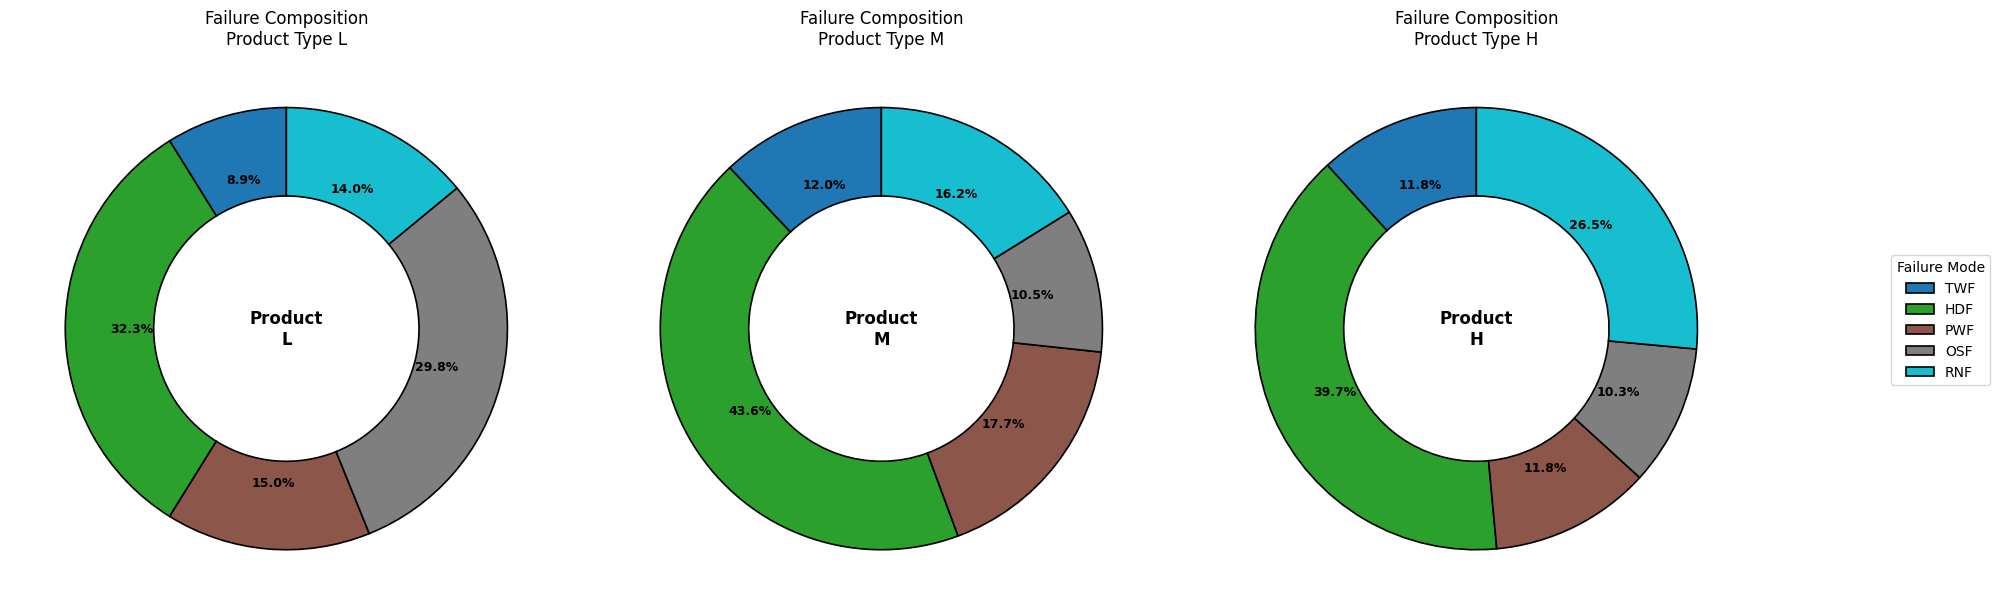

In [134]:
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
product_types = df['Type'].unique()

# Color palette for failures
colors = plt.cm.tab10(np.linspace(0, 1, len(failure_cols))) # type: ignore

# Plot per-product failure composition
fig, axes = plt.subplots(1, len(product_types), figsize=(18, 6))

for ax, p_type in zip(axes, product_types):
    # Filter data for the product type
    subset = df[df['Type'] == p_type]
    
    # Failure counts and percentages
    failure_counts = subset[failure_cols].sum()
    failure_percent = (failure_counts / failure_counts.sum()) * 100

    # Donut chart
    wedges, _ = ax.pie(
        failure_percent,
        startangle=90,
        colors=colors,
        wedgeprops={'width': 0.4, 'edgecolor': 'black', 'linewidth': 1.2}
    )

    # Place percentage labels at middle of donut width
    for wedge, pct in zip(wedges, failure_percent):
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.7 * np.cos(np.deg2rad(angle))
        y = 0.7 * np.sin(np.deg2rad(angle))
        ax.text(x, y, f'{pct:.1f}%', ha='center', va='center', fontsize=9, fontweight='bold')

    # Center label
    ax.text(0, 0, f'Product\n{p_type}', ha='center', va='center', fontsize=12, fontweight='bold')
    ax.set_title(f'Failure Composition\nProduct Type {p_type}')

fig.legend(
    failure_cols,
    title='Failure Mode',
    loc='center right',
    bbox_to_anchor=(1.12, 0.5)
)

plt.tight_layout()
plt.show()

In [135]:
failure_table = (
    df
    .groupby('Type')[failure_cols]
    .sum()
)

# Convert counts to percentages within each product type
failure_percent_table = (
    failure_table
    .div(failure_table.sum(axis=1), axis=0)
    .mul(100)
    .round(2)
)
# Optional: reset index for clean display
failure_percent_table = failure_percent_table.reset_index()
failure_percent_table

,Type,TWF,HDF,PWF,OSF,RNF
0,H,11.76,39.71,11.76,10.29,26.47
1,L,8.85,32.30,14.97,29.85,14.03
2,M,12.03,43.61,17.67,10.53,16.17


**High-Quality Products (H)**
- **Heat Dissipation Failure (HDF)** is dominant (**39.71%**).
- **Random Failures (RNF)** are relatively high (**26.47%**).
- Mechanical failures (TWF, PWF, OSF) are less pronounced.

**Insight:** Failures in high-quality products are primarily driven by **thermal and stochastic factors**, rather than mechanical stress.

---

**Low-Quality Products (L)**
- **Overstrain Failure (OSF)** (**29.85%**) and **HDF** (**32.30%**) dominate.
- Higher mechanical stress compared to other product types.

**Insight:** Low-quality products are more susceptible to **mechanical overstrain**, indicating operation closer to physical limits.

---

**Medium-Quality Products (M)**
- **HDF** is overwhelmingly dominant (**43.61%**).
- Moderate contribution from **PWF** and **RNF**.

**Insight:** Medium-quality products exhibit a strong sensitivity to **thermal conditions**, with relatively lower mechanical stress failures.

---

**Overall Insight**
- **HDF** is the leading failure mode across all product types.
- **OSF** is particularly significant for low-quality products.
- Failure behavior varies by product quality, supporting **product-aware analysis** in predictive maintenance.


#### 1.4.4 Operational Regimes of Machine Failures

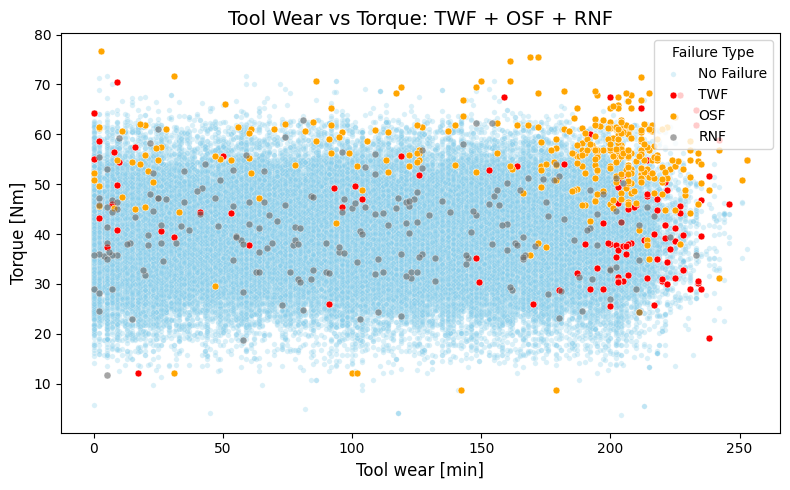

     ToolWear_bin   TWF   OSF   RNF  No Failure
0  (-0.001, 48.0]  0.07  0.13  0.24       98.77
1   (48.0, 106.0]  0.03  0.13  0.25       98.92
2  (106.0, 158.0]  0.03  0.12  0.22       99.03
3  (158.0, 253.0]  0.45  1.18  0.22       97.51


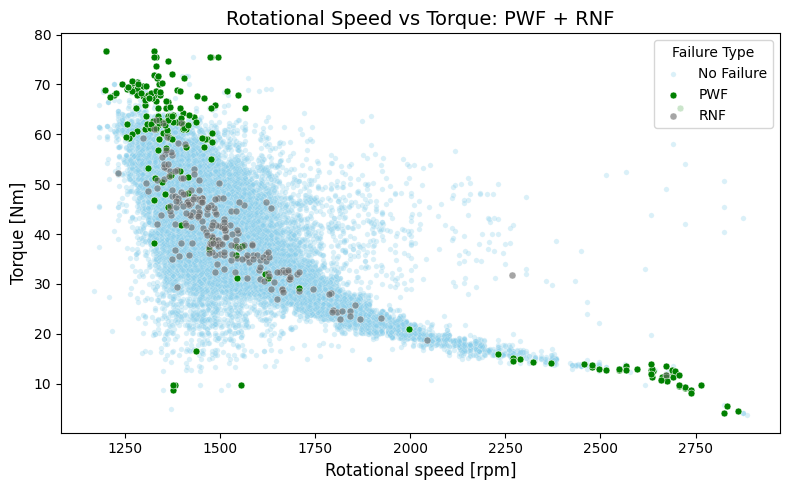

            Speed_bin   PWF   RNF  No Failure
0  (1167.999, 1432.0]  0.57  0.30       95.80
1    (1432.0, 1493.0]  0.08  0.19       99.53
2    (1493.0, 1579.0]  0.04  0.20       99.61
3    (1579.0, 2886.0]  0.24  0.23       99.34


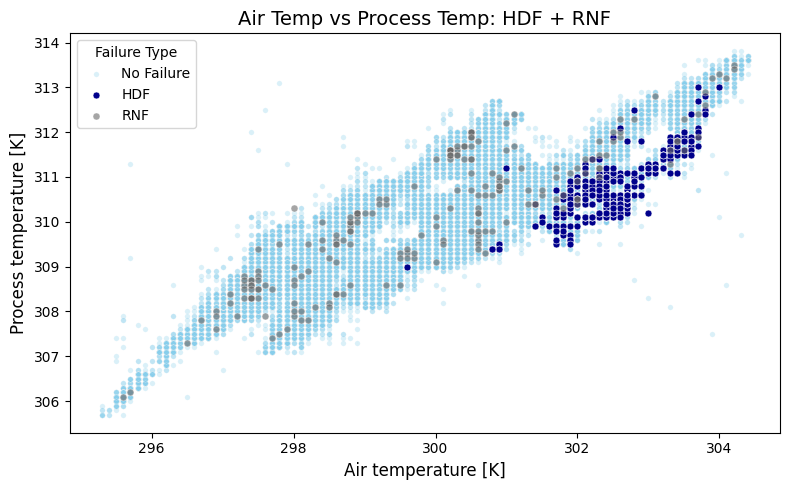

   TempDiff_bin   HDF   RNF  No Failure
0  (3.599, 9.3]  2.01  0.22       97.02
1    (9.3, 9.9]  0.02  0.20       99.14
2   (9.9, 11.0]  0.00  0.20       99.20
3  (11.0, 15.6]  0.00  0.31       98.97


In [136]:
# Define failure colors
failure_colors = {
    'TWF': 'red',
    'OSF': 'orange',
    'PWF': 'green',
    'HDF': 'darkblue',
    'RNF': 'dimgray', 
    'No Failure': 'skyblue'
}

# Create a 'No Failure' column
df['No Failure'] = ((df['TWF']==0) & (df['OSF']==0) & (df['PWF']==0) & (df['HDF']==0) & (df['RNF']==0)).astype(int)

# 1 TWF + OSF + RNF + No Failure
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Tool wear [min]',
    y='Torque [Nm]',
    data=df[df['No Failure']==1],
    color=failure_colors['No Failure'],
    alpha=0.3,
    s=15,
    label='No Failure'
)
sns.scatterplot(
    x='Tool wear [min]',
    y='Torque [Nm]',
    data=df[df['TWF']==1],
    color=failure_colors['TWF'],
    s=25,
    label='TWF'
)
sns.scatterplot(
    x='Tool wear [min]',
    y='Torque [Nm]',
    data=df[df['OSF']==1],
    color=failure_colors['OSF'],
    s=25,
    label='OSF'
)
sns.scatterplot(
    x='Tool wear [min]',
    y='Torque [Nm]',
    data=df[df['RNF']==1],
    color=failure_colors['RNF'],
    alpha=0.6,
    s=25,
    label='RNF'
)
plt.title('Tool Wear vs Torque: TWF + OSF + RNF', fontsize=14)
plt.xlabel('Tool wear [min]', fontsize=12)
plt.ylabel('Torque [Nm]', fontsize=12)
plt.legend(title='Failure Type')
plt.tight_layout()
plt.show()

# Bin tool wear into quartiles
df['ToolWear_bin'] = pd.qcut(df['Tool wear [min]'], q=4)

mechanical_table = (
    df
    .groupby('ToolWear_bin', observed=False)[['TWF', 'OSF', 'RNF', 'No Failure']]
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)
print(mechanical_table)

# 2️ PWF + RNF + No Failure
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    data=df[df['No Failure']==1],
    color=failure_colors['No Failure'],
    alpha=0.3,
    s=15,
    label='No Failure'
)
sns.scatterplot(
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    data=df[df['PWF']==1],
    color=failure_colors['PWF'],
    s=25,
    label='PWF'
)
sns.scatterplot(
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    data=df[df['RNF']==1],
    color=failure_colors['RNF'],
    alpha=0.6,
    s=25,
    label='RNF'
)
plt.title('Rotational Speed vs Torque: PWF + RNF', fontsize=14)
plt.xlabel('Rotational speed [rpm]', fontsize=12)
plt.ylabel('Torque [Nm]', fontsize=12)
plt.legend(title='Failure Type')
plt.tight_layout()
plt.show()

# Bin rotational speed into quartiles
df['Speed_bin'] = pd.qcut(df['Rotational speed [rpm]'], q=4)

power_table = (
    df
    .groupby('Speed_bin', observed=False)[['PWF', 'RNF', 'No Failure']]
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)
print(power_table)


# 3️ HDF + RNF + No Failure
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Air temperature [K]',
    y='Process temperature [K]',
    data=df[df['No Failure']==1],
    color=failure_colors['No Failure'],
    alpha=0.3,
    s=15,
    label='No Failure'
)
sns.scatterplot(
    x='Air temperature [K]',
    y='Process temperature [K]',
    data=df[df['HDF']==1],
    color=failure_colors['HDF'],
    s=25,
    label='HDF'
)
sns.scatterplot(
    x='Air temperature [K]',
    y='Process temperature [K]',
    data=df[df['RNF']==1],
    color=failure_colors['RNF'],
    alpha=0.6,
    s=25,
    label='RNF'
)
plt.title('Air Temp vs Process Temp: HDF + RNF', fontsize=14)
plt.xlabel('Air temperature [K]', fontsize=12)
plt.ylabel('Process temperature [K]', fontsize=12)
plt.legend(title='Failure Type')
plt.tight_layout()
plt.show()

# Create temperature difference
df['Temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']

# Bin temperature difference into quartiles
df['TempDiff_bin'] = pd.qcut(df['Temp_diff'], q=4)

thermal_table = (
    df
    .groupby('TempDiff_bin', observed=False)[['HDF', 'RNF', 'No Failure']]
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)
print(thermal_table)

**1. Mechanical Degradation Regime**  
*(Tool Wear vs Torque: TWF + OSF + RNF)*

- **TWF and OSF are concentrated in the highest tool-wear range (158–253 min)**, confirming a clear **end-of-life threshold effect**.
- **OSF increases more sharply than TWF** at high wear, indicating that **mechanical load amplifies degradation-driven failures**.
- **RNF remains stable (~0.22–0.25%)** across all wear bins, showing no dependency on wear or torque.
- The majority of observations remain **No Failure (>97%)**, even at high wear levels.

**Insight:**  
Mechanical failures are **non-linear and threshold-driven**, dominated by high tool wear combined with load, while random failures behave independently.

---

**2. Power Failure Regime**  
*(Rotational Speed vs Torque: PWF + RNF)*

- **PWF is highest in the lowest speed bin (≈0.57%)**, where torque values are relatively high.
- As rotational speed increases, **PWF frequency drops sharply**, indicating reduced power stress.
- **RNF remains consistent (~0.19–0.30%)** across speed bins.
- The speed–torque relationship forms a clear **inverse operational envelope**, with failures clustering at low-speed, high-torque regions.

**Insight:**  
Power failures are strongly associated with **low-speed, high-torque operating conditions**, consistent with power-demand constraints rather than random behavior.

---

**3. Thermal Failure Regime**  
*(Air Temperature vs Process Temperature: HDF + RNF)*

- **HDF occurs almost exclusively in the lowest temperature-difference bin**, with a failure rate of **~2.01%**, far higher than other bins.
- Once the temperature difference increases, **HDF nearly disappears**.
- **RNF remains flat (~0.20–0.31%)** across all thermal regimes.
- Failures visually cluster along **narrow thermal bands**, not across the full temperature range.

**Insight:**  
Heat dissipation failures are **highly localized and rule-based**, triggered by insufficient temperature gradients rather than broad thermal variability.

---

**Overall Insight**

- All major failure modes exhibit **localized operational regimes** rather than global separation.
- **RNF behaves as true background noise**, validating its treatment as non-informative in scatter-based analysis.
- The lack of clean visual separation reinforces the need for **interaction-aware and non-linear modeling approaches** in predictive maintenance.


#### 1.4.5 Correlation Analysis

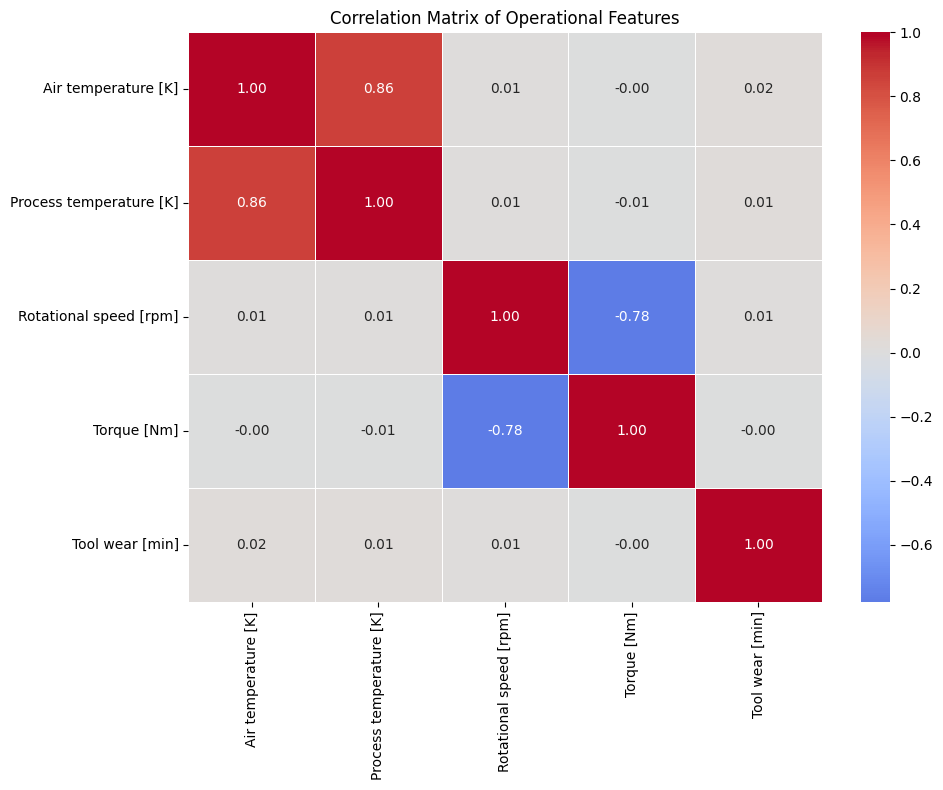

In [137]:
corr_cols = [
'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title('Correlation Matrix of Operational Features')
plt.tight_layout()
plt.show()

- **Air temperature and process temperature** exhibit a strong positive correlation (**≈ 0.86**), confirming a direct thermal dependency between ambient and process conditions.
- **Rotational speed and torque** show a strong negative correlation (**≈ −0.78**), reflecting the underlying physical power relationship of the milling machine.
- **Tool wear** shows near-zero correlation with other operational features, indicating that wear progression is largely **independent of instantaneous operating conditions**.
- Other feature pairs display **negligible linear correlation**, suggesting low redundancy among inputs.

**Overall Insight:**  
The correlation structure aligns with known physical relationships while showing **no excessive multicollinearity** among operational features. This supports retaining all core variables for modeling and reinforces the need for **interaction-aware and non-linear models**, as linear correlations alone do not capture failure-driving behavior.


#### 1.4.6 Target-conditional distribution analysis

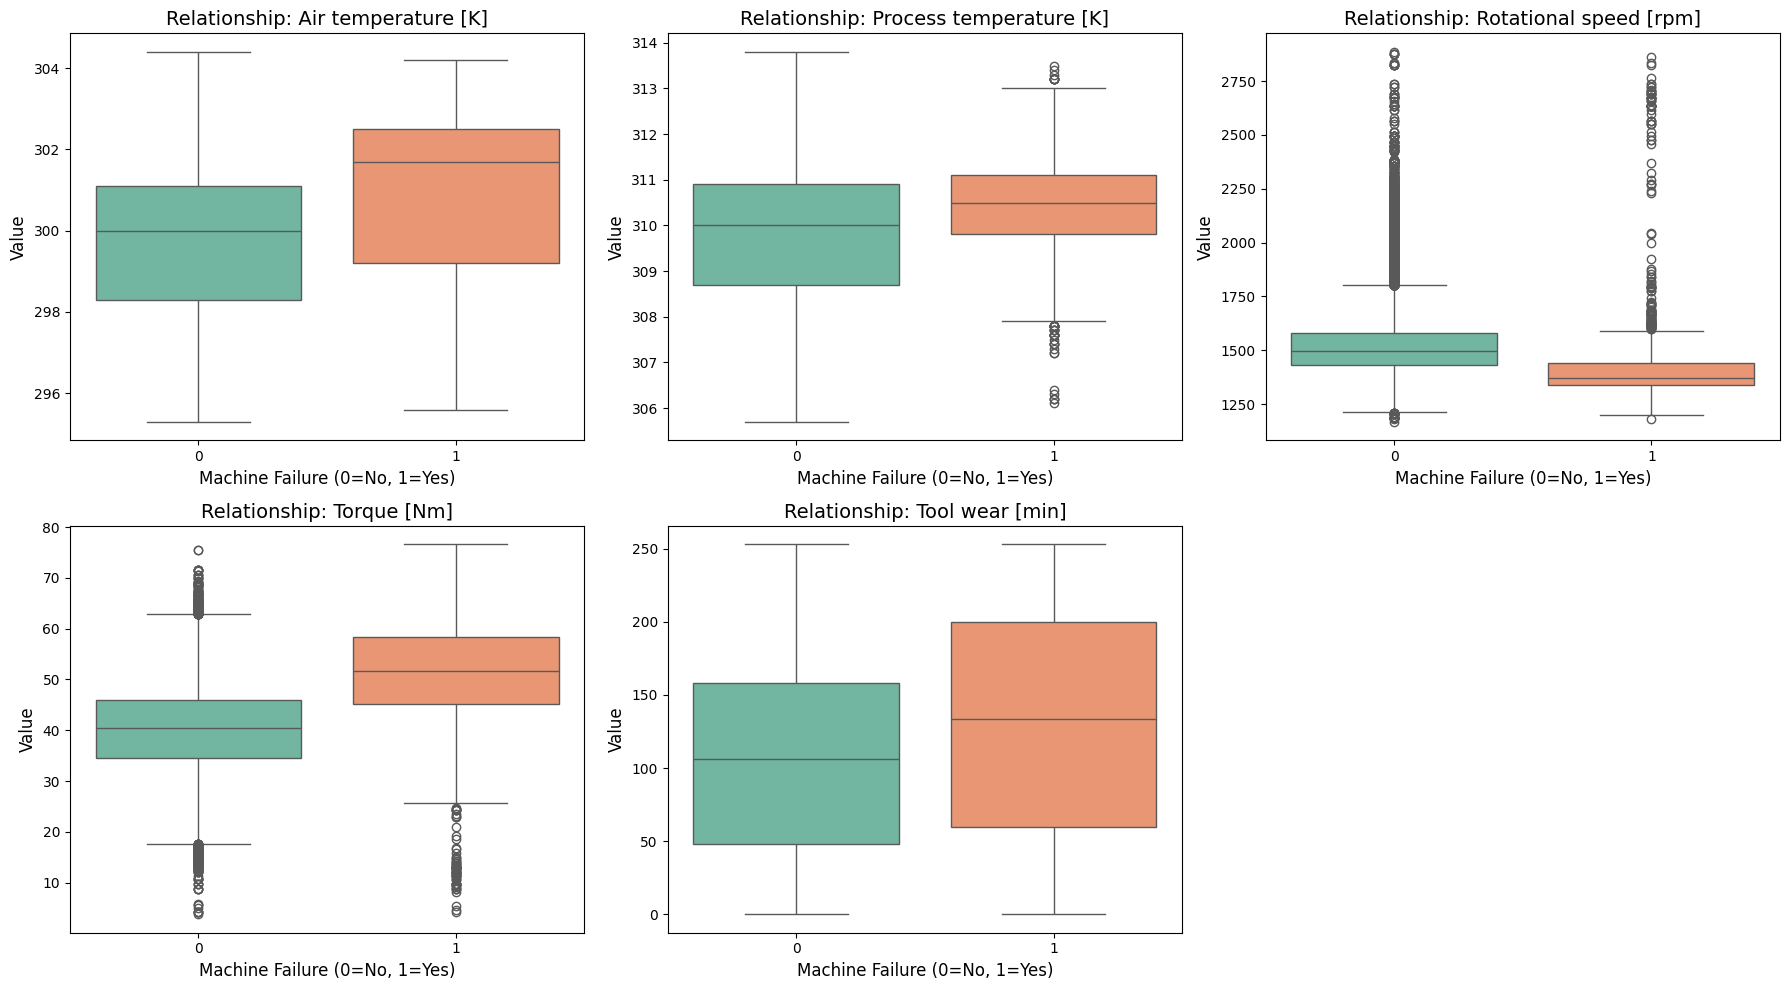

In [138]:
# 1. Define your features
features = [
    'Air temperature [K]', 
    'Process temperature [K]', 
    'Rotational speed [rpm]', 
    'Torque [Nm]', 
    'Tool wear [min]'
]
df['machine_failure'] = (df[['TWF', 'OSF', 'PWF', 'HDF', 'RNF']].sum(axis=1)>0).astype(int)

# 2. Set up a grid (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten() 

# 3. Create a box plot for each feature
for i, col in enumerate(features):
    # FIX: Added hue='machine_failure' and legend=False to stop the warnings
    sns.boxplot(
        x='machine_failure', 
        y=col, 
        data=df, 
        ax=axes[i], 
        palette='Set2', 
        hue='machine_failure', 
        legend=False
    )
    axes[i].set_title(f'Relationship: {col}', fontsize=14)
    axes[i].set_xlabel('Machine Failure (0=No, 1=Yes)', fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)

# 4. Clean up: Remove the empty 6th subplot
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# # 1. Group by the target and calculate the mean for your features
# summary_table = df.groupby('machine_failure')[features].mean().T

# # 2. Rename columns for clarity
# summary_table.columns = ['Mean (No Failure)', 'Mean (Failure)']

# # 3. Calculate the difference and the % change to show the "strength" of correlation
# summary_table['Absolute Diff'] = summary_table['Mean (Failure)'] - summary_table['Mean (No Failure)']
# summary_table['% Change'] = (summary_table['Absolute Diff'] / summary_table['Mean (No Failure)']) * 100

# # 4. Add a "Relationship" column to explain the correlation direction
# summary_table['Correlation Type'] = summary_table['% Change'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# # Display the table
# print("--- Feature Comparison Table ---")
# summary_table.round(2)

To better understand the relationship between operational features and the binary `machine_failure` target, feature distributions were analyzed using boxplots and group-wise summary statistics.

---
**Key Observations**

- **Torque and Tool Wear show the strongest separation** between failure and non-failure cases.
  - Torque increases by approximately **24%** in failure cases.
  - Tool wear increases by approximately **22%** in failure cases.
  - This aligns with earlier findings that mechanical stress and degradation are key failure drivers.

- **Rotational speed decreases in failure cases** (≈ **−5%**), indicating that failures are more likely to occur under **low-speed, high-load operating conditions**.
  - This supports the observed power-related and overstrain failure regimes.

- **Air temperature and process temperature show only marginal increases** in failure cases.
  - The small percentage changes suggest that **absolute temperature values alone are weak predictors**.
  - This reinforces the importance of **derived thermal features** (e.g., temperature difference) over raw temperature measurements.

### Overall EDA Insights

This exploratory analysis provides a clear, evidence-based understanding of **machine failure behavior**, grounded in distributional analysis, failure-specific operational regimes, and target-conditional feature behavior.

---

**1. Dataset Characteristics**
- Machine failures are **rare events**, resulting in a **highly imbalanced dataset** dominated by normal operating conditions.
- Operational variables (temperature, rotational speed, torque, tool wear) exhibit **realistic industrial ranges**, reflecting controlled thermal conditions and varying mechanical stress levels.

---

**2. Product Quality and Failure Context**
- **Low-quality products** account for the majority of observations, while **high-quality products** form a relatively small subset.
- Failure composition differs by product type, indicating that **failure mechanisms are influenced by product quality** rather than being uniform across all categories.
- Heat dissipation failures are present across all product types, whereas **mechanical overstrain failures are more prominent in low-quality products**, consistent with higher susceptibility to mechanical stress.

---

**3. Failure-Specific Operational Regimes**
- **Mechanical failures (TWF & OSF)** are **threshold-driven**, occurring predominantly at **high tool wear levels combined with elevated torque**, indicating cumulative degradation and load amplification.
- **Power failures (PWF)** are concentrated in **low-speed, high-torque operating regimes**, aligning with power constraint definitions.
- **Heat dissipation failures (HDF)** occur within **narrow thermal bands**, driven by insufficient temperature gradients rather than absolute temperature extremes.
- **Random failures (RNF)** exhibit no systematic dependence on operational parameters and behave as true background noise.

---

**4. Multivariate Structure and Feature Relationships**
- Strong linear correlations appear only where **physical dependencies are expected**, such as between air and process temperatures and between rotational speed and torque.
- Tool wear shows minimal linear correlation with instantaneous operational features, indicating that **wear progression is largely independent of momentary operating conditions**.
- No severe multicollinearity is observed among core operational features, supporting their joint use in modeling.

---
**5. Target-Conditional Feature Behavior (Binary Classification Perspective)**
- Comparing feature distributions between failure and non-failure cases reveals **directional shifts rather than linear relationships**.
- **Torque and tool wear exhibit the largest increases in failure cases**, confirming that **mechanical stress and accumulated degradation are primary drivers of machine failure**.
- **Rotational speed tends to be lower during failure events**, reinforcing the relevance of low-speed, high-load regimes.
- **Air and process temperatures show only marginal differences** between failure and non-failure cases, indicating that **raw temperature values alone are weak predictors** and that derived thermal features are more informative.


---

**6. Key Implications for Modeling and Decision-Making**
The EDA findings directly inform downstream modeling strategy:

- Machine failures are **not linearly separable** in feature space, making simple linear models and correlation-based feature selection inappropriate.
- **Interaction-aware and domain-driven feature engineering** (e.g., power, temperature difference, wear–load interactions) is necessary.
- **Non-linear models**, particularly tree-based and ensemble methods, are well-suited to capture threshold-based and localized failure behavior.
- **Class imbalance handling is critical**, requiring techniques such as class weighting or resampling.
- Model evaluation should prioritize **recall, F1-score, and cost-sensitive metrics**, reflecting the operational cost of missed failures.

---

**EDA Conclusion**
Machine failures are driven by **localized operational stress zones** characterized by mechanical load, accumulated wear, and constrained power and thermal conditions, rather than by broad global trends. Feature behavior relative to the binary failure target confirms that failures emerge from **interaction-driven and threshold-based mechanisms**. These insights provide a robust foundation for **preprocessing design, feature engineering, and non-linear, imbalance-aware modeling** in subsequent stages of this project.